In [4]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import itertools

from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
train=pd.read_csv("train.csv")
print("********quantative data************")
print(train.describe())

********quantative data************
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [29]:
print("***qualitative data*********")
print(train.describe(include=[object]))

***qualitative data*********
         Loan_ID
count        615
unique       615
top     LP001636
freq           1


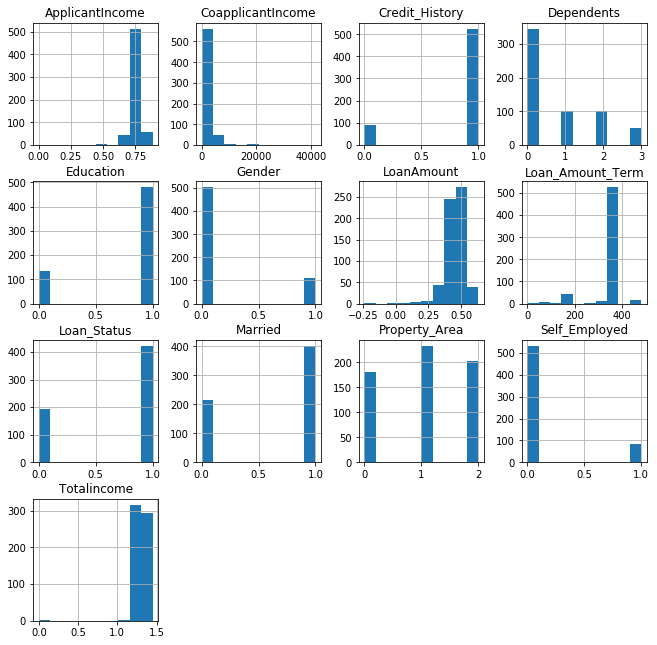

In [36]:
train[train.dtypes[(train.dtypes=="float64")|(train.dtypes=="int64")].index.values].hist(figsize=[11,11])
plt.show()

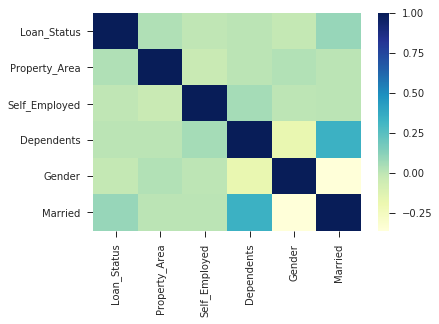

In [54]:
# correlation table
corr=train[['Loan_Status',"Property_Area","Self_Employed","Dependents","Gender","Married"]].corr()
sns.heatmap(corr, fmt=".2f",cmap="YlGnBu")
plt.show()


In [60]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '500px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '500px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Loan_Status,Property_Area,Self_Employed,Dependents,Gender,Married
Loan_Status,1,0.035,-0.0027,0.0086,-0.017,0.094
Property_Area,0.035,1,-0.03,0.0085,0.027,0.0072
Self_Employed,-0.0027,-0.03,1,0.058,0.00083,0.0054
Dependents,0.0086,0.0085,0.058,1,-0.17,0.34
Gender,-0.017,0.027,0.00083,-0.17,1,-0.36
Married,0.094,0.0072,0.0054,0.34,-0.36,1


In [16]:
train.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#convert categorial value into NumericAlign
train['Gender'] = train['Gender'].map({'Female': 1, 'Male': 0})

train['Married'] = train['Married'].map({'Yes': 1, 'No': 0})

train['Dependents'] = train['Dependents'].str.replace('+', '')
train['Dependents'] = train['Dependents'].map({'0': 0, '1': 1, '2' : 2, '3' : 3})

train['Education'] = train['Education'].map({'Graduate': 1, 'Not Graduate': 0})

train['Self_Employed'] = train['Self_Employed'].map({'No': 0, 'Yes': 1})

train['Property_Area'] = train['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban' : 2})

train['Loan_Status'] = train['Loan_Status'].map({'Y': 1, 'N': 0})
print(train.apply(lambda x:sum(x.isnull()),axis=0))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [110]:
impute = train.pivot_table(values=['Dependents'], 
                           index=['Married', 'Property_Area', 'Gender','Self_Employed'],
                           aggfunc=np.median)

for i,row in train.loc[train['Dependents'].isnull(),:].iterrows():
    ind = tuple([row['Married'],row['Property_Area'],row['Gender'],row['Self_Employed']])
    train.loc[i,'Dependents'] = impute.loc[ind].values[0]

print(train.apply(lambda x:sum(x.isnull()),axis=0))

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome      615
CoapplicantIncome      0
LoanAmount           615
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
Totalincome            0
Total_Income           0
TotalIncome            0
TotalIncome_log      274
TotalIncomelog       274
Totalincomelog       615
dtype: int64


/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


In [9]:
print("**********logistic regression model*************")
#logistic regression model
def classification_model(model, train, predictors, outcome):
    #Fit the model:
    model.fit(train[predictors],train[outcome])
  
  #Make predictions on training set:
    predictions = model.predict(train[predictors])
  
  #Print accuracy
    accuracy = metrics.accuracy_score(predictions,train[outcome])
    
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, train,predictor_var,outcome_var)


**********logistic regression model*************


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [84]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 80.976%
